In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/raw/electricity_marketing_dataset.csv')
print(df.describe())

       temperature    humidity  is_weekend  is_holiday  price_signal  \
count   720.000000  720.000000  720.000000  720.000000    720.000000   
mean      0.455479    0.505229    0.266667    0.100000      0.524966   
std       0.139037    0.293866    0.442524    0.300209      0.198789   
min       0.000000    0.000000    0.000000    0.000000      0.000000   
25%       0.358987    0.237601    0.000000    0.000000      0.383243   
50%       0.455478    0.524002    0.000000    0.000000      0.521803   
75%       0.545769    0.752574    1.000000    0.000000      0.667191   
max       1.000000    1.000000    1.000000    1.000000      1.000000   

       historical_avg_demand  voltage_level  grid_frequency  energy_source_mix  
count             720.000000     720.000000      720.000000         720.000000  
mean                0.459493       0.529946        0.444355           0.404876  
std                 0.193602       0.163532        0.148376           0.252634  
min                 0.00000

In [3]:
# Change timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

print(df.index.dtype)

datetime64[ns]


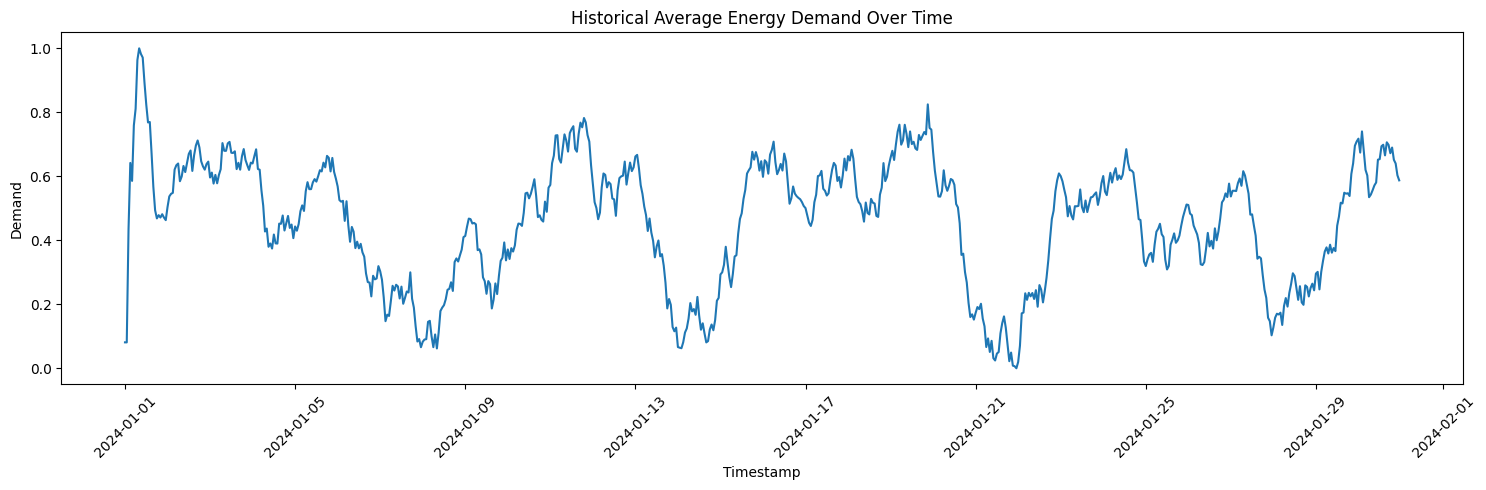

In [5]:
# Time series plot of historical average demand
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['historical_avg_demand'])
plt.title('Historical Average Energy Demand Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Demand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

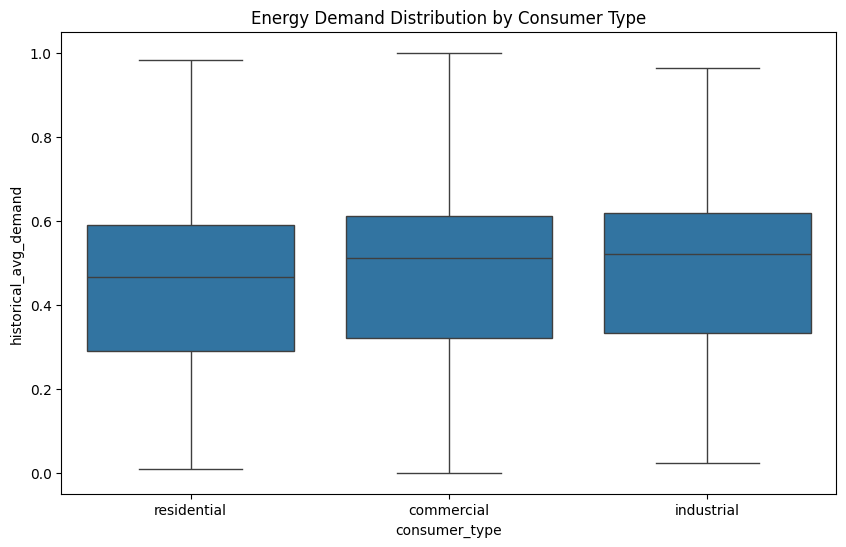

In [6]:
# Box plot of demand by consumer type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='consumer_type', y='historical_avg_demand')
plt.title('Energy Demand Distribution by Consumer Type')
plt.show()

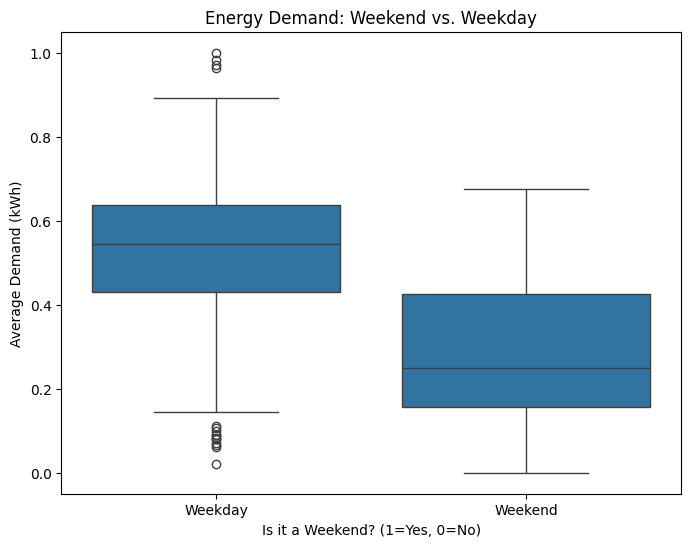

In [7]:
# Demand by Weekend vs. Weekday ---
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_weekend', y='historical_avg_demand', data=df)
plt.title('Energy Demand: Weekend vs. Weekday')
plt.xlabel('Is it a Weekend? (1=Yes, 0=No)')
plt.ylabel('Average Demand (kWh)')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()

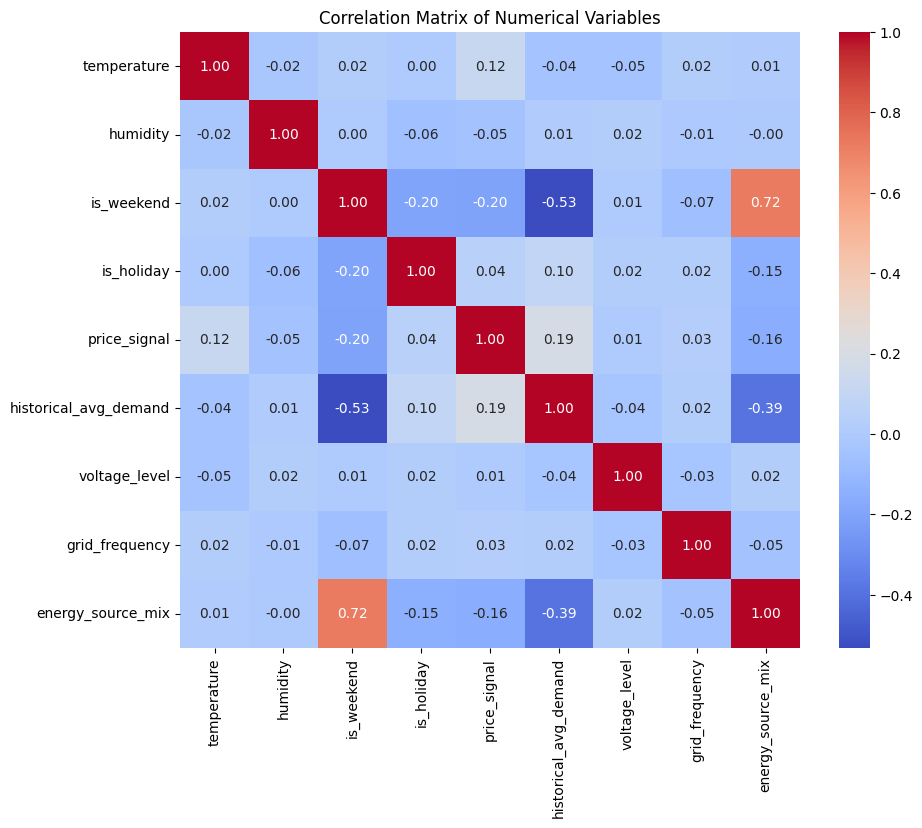

In [8]:
# Correlation heatmap of numerical features
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

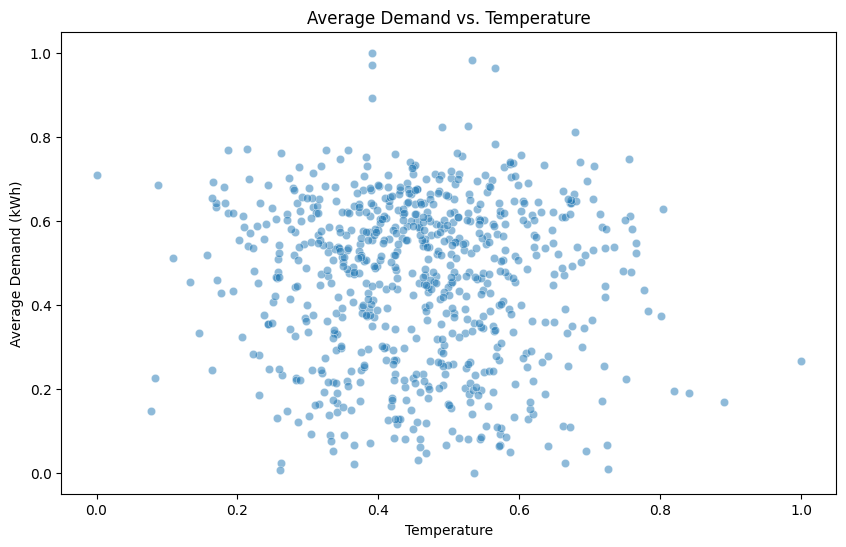

In [9]:
# Scatter plot for the strongest correlation (e.g., Temperature)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='historical_avg_demand', data=df, alpha=0.5)
plt.title('Average Demand vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Average Demand (kWh)')
plt.show()

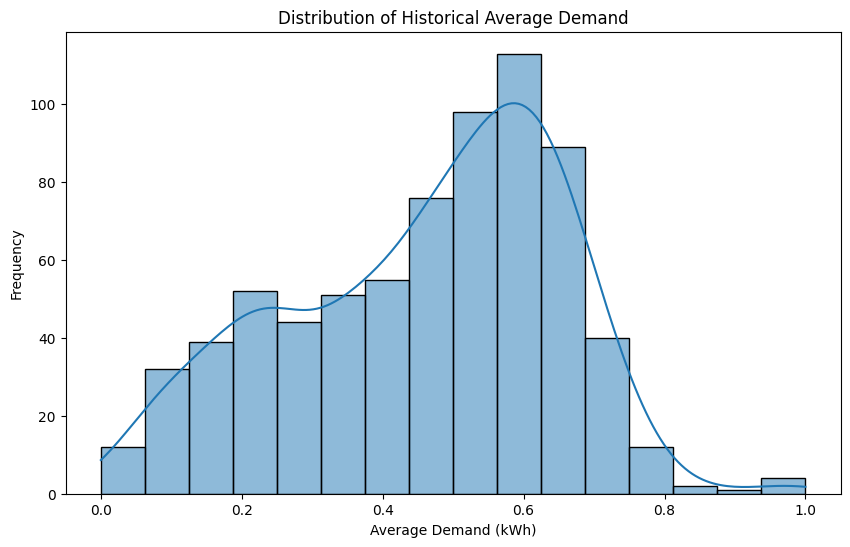

In [10]:
# Distribution of historical average demand
plt.figure(figsize=(10, 6))
sns.histplot(df['historical_avg_demand'], kde=True)
plt.title('Distribution of Historical Average Demand')
plt.xlabel('Average Demand (kWh)')
plt.ylabel('Frequency')
plt.show()